In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [5]:
sns.set(style="whitegrid")

#load the data
years = list(range(2016, 2024))
file_paths = {
    2023: 'Datasets/2023 Pollution Inventory Dataset V2.xlsx',
    2022: 'Datasets/2022 Pollution Inventory Dataset V2.xlsx',
    2021: 'Datasets/2021 Pollution Inventory Dataset.xlsx',
    2020: 'Datasets/2020 Pollution Inventory Dataset V2.xlsx',
    2019: 'Datasets/2019 Pollution Inventory Dataset V2.xlsx',
    2018: 'Datasets/2018 Pollution Inventory.xlsx',
    2017: 'Datasets/2017 Pollution Inventory Dataset.xlsx',
    2016: 'Datasets/2016 Pollution Inventory dataset - version 2.xlsx',
}

# read the data of each year
dfs = {}
for year in years:
    dfs[year] = pd.read_excel(
        file_paths[year],
        sheet_name=1 if year == 2016 else 0,
        skiprows=9
    )


In [8]:
dfs[2017]

,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR
0,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Methane,10000.00000,141000,Landfill,Non Hazardous Landfill
1,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
2,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Tetrachloroethane (1,1,2,2-Tetrachloroethane)",10.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
3,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Butadiene (1,3-Butadiene)",100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
4,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Tetrachloroethylene (PER),100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31964,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Nickel,10.00000,Below Reporting Threshold,EfW,EfW
31965,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Chlorine and inorganic chlorine compounds - as...,10000.00000,Below Reporting Threshold,EfW,EfW
31966,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Fluorine and inorganic fluorine compounds - as HF,1000.00000,Below Reporting Threshold,EfW,EfW
31967,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Non-methane volatile organic compounds (NMVOCs),10000.00000,Below Reporting Threshold,EfW,EfW


In [9]:
# Save the results processed each year
heptachlor_data = {}

for year, df in dfs.items():
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR'].copy()
    df_filtered = df_filtered[df_filtered['QUANTITY RELEASED (kg)'].str.upper() != 'BELOW REPORTING THRESHOLD']
    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])
    heptachlor_data[year] = df_filtered


In [13]:
summary_stats = []

for year in years:
    df = heptachlor_data.get(year)
    all_data = dfs[year]
    
    if df is None or df.empty:
        continue  # If there is no valid data for that year, skip the statistics
    
    quantity = df['QUANTITY RELEASED (kg)']
    reporting_thresholds = df['REPORTING THRESHOLD (kg)'].dropna().unique()
    
    stats = {
        'Year': year,
        'Total Quantity Released': quantity.sum(),
        'Mean': quantity.mean(),
        'Standard deviation': quantity.std(),
        'Min': quantity.min(),
        'Max': quantity.max(),
        '5th Percentile': np.percentile(quantity, 5),
        '10th Percentile': np.percentile(quantity, 10),
        '25th Percentile': np.percentile(quantity, 25),
        '50th Percentile': np.percentile(quantity, 50),
        '75th Percentile': np.percentile(quantity, 75),
        '90th Percentile': np.percentile(quantity, 90),
        '95th Percentile': np.percentile(quantity, 95),
        'Reporting Threshold': reporting_thresholds[0] if len(reporting_thresholds) > 0 else np.nan,
        'Nb of Obs': len(df),
        'NB of obs below reporting threshold': sum(
            (all_data['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR') &
            (all_data['QUANTITY RELEASED (kg)'].astype(str).str.upper() == 'BELOW REPORTING THRESHOLD')
        ),
        'Nb of different sites': df['EA AREA NAME'].nunique(),
        'Mean nb years per sites': df['EA AREA NAME'].value_counts().mean()
    }
    
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df


,Year,Total Quantity Released,Mean,Standard deviation,Min,Max,5th Percentile,10th Percentile,25th Percentile,50th Percentile,75th Percentile,90th Percentile,95th Percentile,Reporting Threshold,Nb of Obs,NB of obs below reporting threshold,Nb of different sites,Mean nb years per sites
0,2019,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.0,1,56,1,1.0
1,2020,2.31693,2.31693,NaN,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,0.1,1,55,1,1.0


In [16]:
for year in years:
    print(f"{year}: {len(heptachlor_data.get(year, []))} observations")


2016: 0 observations
2017: 0 observations
2018: 0 observations
2019: 1 observations
2020: 1 observations
2021: 0 observations
2022: 0 observations
2023: 0 observations


In [23]:
from collections import defaultdict

# Get all the area names that have appeared (complete set)
all_regions = set()
for df in heptachlor_data.values():
    all_regions.update(df['EA AREA NAME'].dropna().unique())

# Initialize the annual regional frequency statistics table
region_share_clean = []

for year in years:
    df = heptachlor_data.get(year)
    row = {'Year': year}
    
    if df is None or df.empty:
        for region in all_regions:
            row[region] = 0.0
    else:
        total = len(df)
        counts = df['EA AREA NAME'].value_counts()
        for region in all_regions:
            row[region] = round((counts.get(region, 0) / total) * 100, 2)
    
    region_share_clean.append(row)

region_df_clean = pd.DataFrame(region_share_clean).set_index('Year').sort_index()
region_df_clean


,Thames,"Devon, Cornwall and the Isles of Scilly"
Year,,
2016,0.0,0.0
2017,0.0,0.0
2018,0.0,0.0
2019,100.0,0.0
2020,0.0,100.0
2021,0.0,0.0
2022,0.0,0.0
2023,0.0,0.0


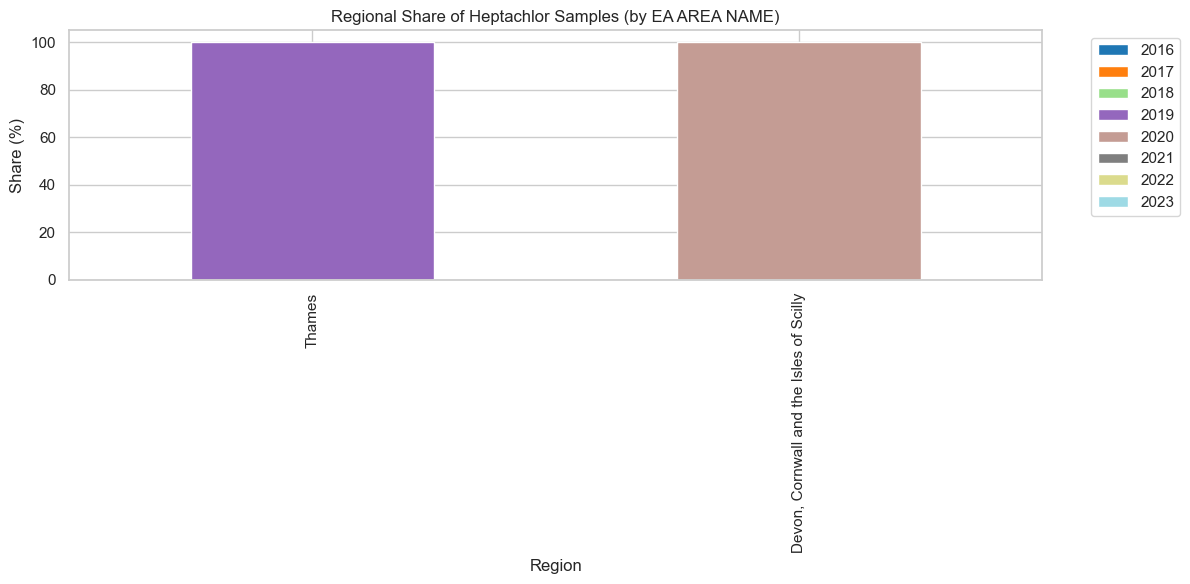

In [20]:
region_df_T = region_df.T
region_df_T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Regional Share of Heptachlor Samples (by EA AREA NAME)")
plt.ylabel("Share (%)")
plt.xlabel("Region")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


In [24]:
# Count the frequency of Heptachlor occurrence each year 
# (including all records, regardless of whether they are "Below Reporting Threshold" or not)
heptachlor_freq = []

for year in years:
    df = dfs[year]
    count = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR'].shape[0]
    heptachlor_freq.append({'Year': year, 'Heptachlor Frequency': count})

heptachlor_freq_df = pd.DataFrame(heptachlor_freq).set_index('Year')
heptachlor_freq_df


,Heptachlor Frequency
Year,
2016,39
2017,36
2018,49
2019,57
2020,56
2021,63
2022,56
2023,49


In [31]:
# Collect the complete set of all areas
all_regions = set()
for year in years:
    df = dfs[year]
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR']
    all_regions.update(df_filtered['EA AREA NAME'].dropna().unique())

# Calculate the occurrence frequency of each region in each year 
# (including "Below Threshold")
region_frequency = []

for year in years:
    df = dfs[year]
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR']
    
    row = {'Year': year}
    counts = df_filtered['EA AREA NAME'].value_counts()
    
    for region in all_regions:
        row[region] = counts.get(region, 0)
    
    region_frequency.append(row)

region_freq_df = pd.DataFrame(region_frequency).set_index('Year').sort_index()
region_freq_df

,"Devon, Cornwall and the Isles of Scilly",Cumbria and Lancashire,Lincolnshire and Northamptonshire,East Anglia,Hertfordshire and North London,West Midlands,"Kent, South London and East Sussex",Wessex,East Midlands,North East,Greater Manchester Merseyside and Cheshire,Solent and South Downs,Thames,Yorkshire
Year,,,,,,,,,,,,,,
2016,1,6,4,2,1,5,1,0,0,6,4,1,0,8
2017,1,4,3,2,0,6,1,0,0,7,7,0,0,5
2018,2,6,6,6,0,6,3,1,0,4,7,1,0,7
2019,1,5,6,5,0,9,3,1,0,4,9,4,1,9
2020,1,5,9,6,1,4,1,0,0,4,11,3,1,10
2021,1,6,8,8,1,5,2,1,0,5,10,3,3,10
2022,2,6,10,9,2,4,2,0,1,4,4,1,1,10
2023,1,3,8,8,2,5,1,1,0,5,6,1,2,6


#Regional frequency stacked bar chart (include below threshold)

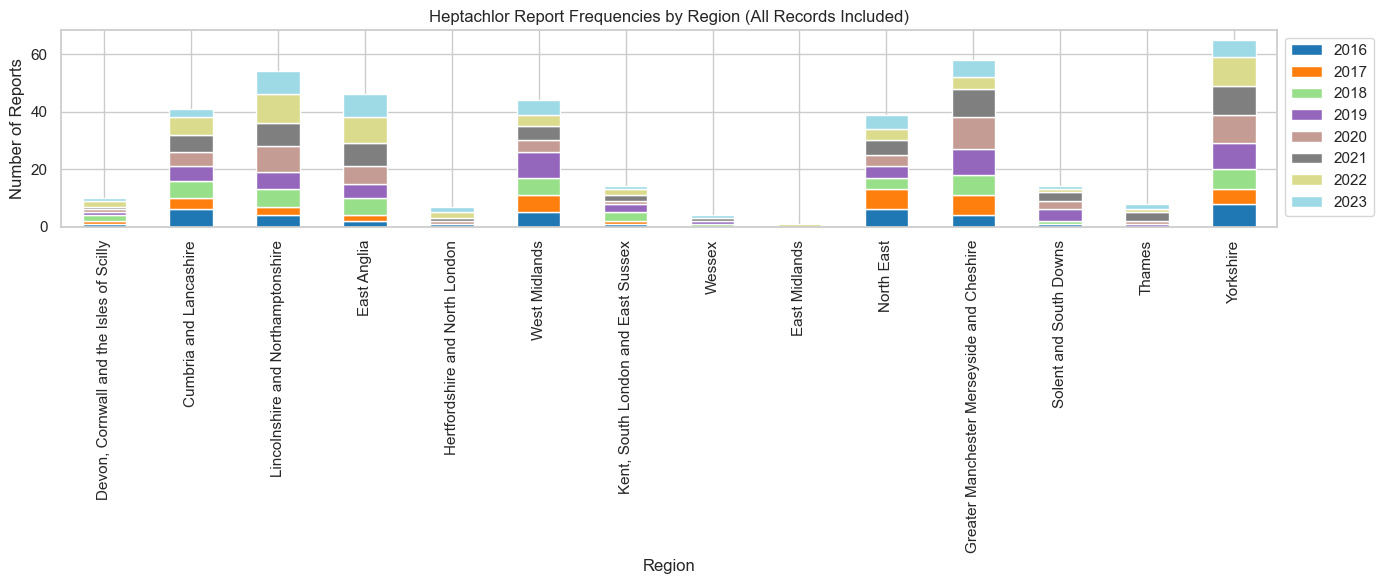

In [30]:
region_freq_df.T.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Heptachlor Report Frequencies by Region (All Records Included)")
plt.ylabel("Number of Reports")
plt.xlabel("Region")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

In [25]:
# The frequency of the OPERATOR NAME for all records 
# (including "Below Reporting Threshold")
operator_all = {}

for year in years:
    df = dfs[year]
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR']
    
    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_all[year] = op_counts

# Merge all years to construct the total frequency matrix
df_op_all = pd.DataFrame(operator_all).fillna(0).astype(int).T
df_op_all.index.name = 'Year'
df_op_all


,3C Waste Limited,ALAB ENVIRONMENTAL SERVICES LIMITED,Ainsworth; Ainsworth,BKP Waste & Recycling Limited,Biffa Waste Services Limited,Biffa Waste Services Ltd,Bradley Park Waste Management Limited,Britvic Soft Drinks Plc,CLEANSING SERVICE GROUP LTD,Catplant Quarry Ltd,...,Viridor Waste Management Limited,WESTCOMBE WASTE LTD,Waste Recycling Group (Central) Limited,Waste Recycling Group (Yorkshire) Limited,Water Hall (England) Ltd,Welbeck Waste Management Ltd,Whitehead Restoration Ltd,Whitemoss Landfill Holdings Limited,Woodford Waste Management Services Limited,Woods Waste Limited
Year,,,,,,,,,,,,,,,,,,,,,
2016,2,1,0,0,0,0,2,0,2,1,...,0,0,2,1,1,1,0,0,0,2
2017,2,5,0,0,0,0,2,0,1,1,...,0,0,1,0,0,0,0,0,0,2
2018,2,4,1,0,0,1,2,0,0,1,...,1,0,1,1,0,1,0,0,0,2
2019,2,4,1,3,0,0,2,0,0,1,...,2,0,1,1,0,1,1,0,0,2
2020,2,4,0,3,1,0,1,0,1,1,...,4,0,1,1,0,1,1,0,0,2
2021,2,4,0,3,0,0,2,1,0,1,...,6,1,1,1,0,1,1,1,0,2
2022,2,5,0,1,0,0,2,1,0,1,...,6,0,1,1,0,1,1,0,0,3
2023,2,2,0,1,0,0,2,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [26]:
# Only include the frequency of OPERATOR names that exceed the Threshold 
# (i.e., excluding "Below Reporting Threshold")
operator_above = {}

for year in years:
    df = dfs[year]
    df_filtered = df[
        (df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR') &
        (df['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD')
    ]
    
    # Numerical processing
    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])

    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_above[year] = op_counts

df_op_above = pd.DataFrame(operator_above).fillna(0).astype(int).T
df_op_above.index.name = 'Year'
df_op_above


/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_85260/49959114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_85260/49959114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')


,Veolia Environmental Services West Berkshire Ltd,Viridor Waste Management Limited
Year,,
2016,0,0
2017,0,0
2018,0,0
2019,1,0
2020,0,1
2021,0,0
2022,0,0
2023,0,0


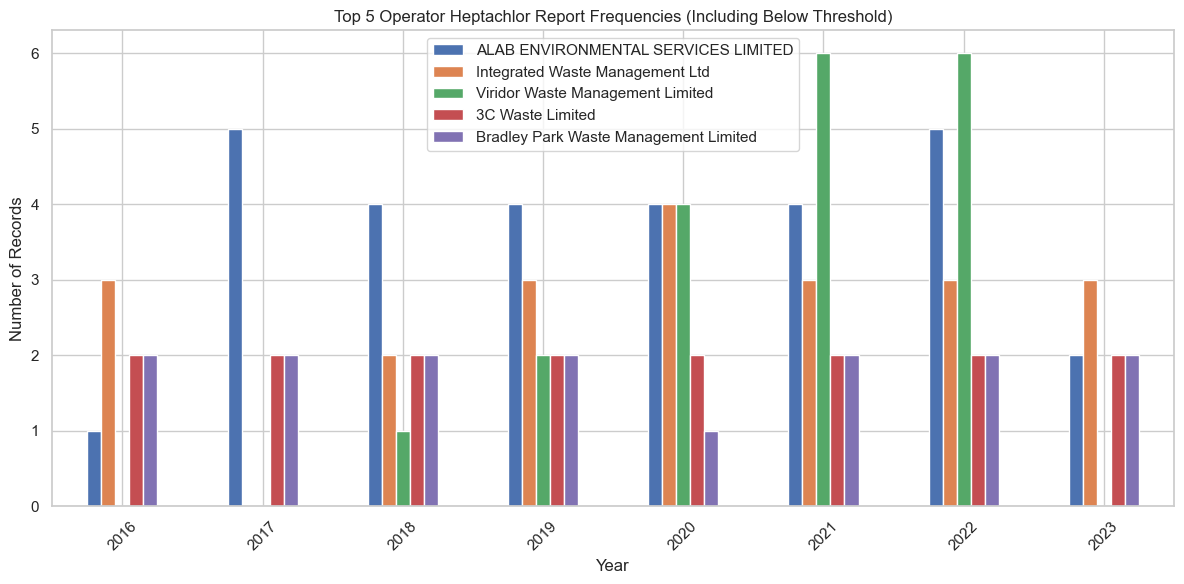

In [27]:
# Identify the top 5 enterprises with the highest overall frequency
top_operators = df_op_all.sum().sort_values(ascending=False).head(5).index

# Extract the time series of these several enterprises
df_op_all[top_operators].plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 Operator Heptachlor Report Frequencies (Including Below Threshold)")
plt.ylabel("Number of Records")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
